In [1]:
import pandas
import sys
import os
import numpy as np
import json
sys.path.insert(0, os.getcwd())
from helpers import recursive_find, read_json, create_fedora_results_table, create_sizes_table

In [2]:
# Read in the experiment json files. One experiment means one package at once version
# across splices (versions of a single dependencny) and predictors
experiments = list(recursive_find("artifacts/results/extracted/fedora", "*.json"))

print('Found %s experiment library files.' % len(experiments))

Found 7660 experiment library files.


In [3]:
sizes = create_sizes_table(experiments)
sizes

,name,size_bytes
0,/__w/splice-experiment-runs/splice-experiment-...,86256
1,/__w/splice-experiment-runs/splice-experiment-...,90424
2,/__w/splice-experiment-runs/splice-experiment-...,53648
3,/__w/splice-experiment-runs/splice-experiment-...,57888
4,/__w/splice-experiment-runs/splice-experiment-...,304992
...,...,...
15315,/__w/splice-experiment-runs/splice-experiment-...,40
15316,/__w/splice-experiment-runs/splice-experiment-...,38
15317,/__w/splice-experiment-runs/splice-experiment-...,38
15318,/__w/splice-experiment-runs/splice-experiment-...,35


In [4]:
df = create_fedora_results_table(experiments)
display(df)

,a,b,original,changed,analysis,seconds,predictor,prediction,size_original,size_changed
0,fedora-libs-34,fedora-libs-37,first/usr/lib64/libx11globalcomm.so.1.0.0,second/usr/lib64/libx11globalcomm.so.1.0.0,missing-previously-found-symbols,0.000063,symbols,False,86256,90424
1,fedora-libs-34,fedora-libs-37,first/usr/lib64/libx11globalcomm.so.1.0.0,second/usr/lib64/libx11globalcomm.so.1.0.0,missing-previously-found-exports,0.000026,symbols,True,86256,90424
2,fedora-libs-34,fedora-libs-37,first/usr/lib64/libx11globalcomm.so.1.0.0,second/usr/lib64/libx11globalcomm.so.1.0.0,abidiff,0.377612,libabigail,False,86256,90424
3,fedora-libs-34,fedora-libs-37,first/usr/lib64/libx11globalcomm.so.1.0.0,second/usr/lib64/libx11globalcomm.so.1.0.0,abi-compliance-tester,0.22648,abi-laboratory,False,86256,90424
4,fedora-libs-35,fedora-libs-36,first/usr/lib64/libwacom.so.2.6.1,second/usr/lib64/libwacom.so.9.0.0,missing-previously-found-symbols,0.000082,symbols,True,53648,57888
...,...,...,...,...,...,...,...,...,...,...
30635,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/32/li...,second/usr/lib/gcc/x86_64-redhat-linux/12/32/l...,abi-compliance-tester,0.108163,abi-laboratory,False,38,38
30636,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/32/li...,second/usr/lib/gcc/x86_64-redhat-linux/12/32/l...,missing-previously-found-symbols,0.000004,symbols,Unknown,35,35
30637,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/32/li...,second/usr/lib/gcc/x86_64-redhat-linux/12/32/l...,missing-previously-found-exports,0.000002,symbols,Unknown,35,35
30638,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/32/li...,second/usr/lib/gcc/x86_64-redhat-linux/12/32/l...,abidiff,0.00576,libabigail,False,35,35


In [6]:
df_original = df[["original", "analysis", "size_original", "seconds"]].rename(columns={"original": "filename", "size_original": "size_bytes"})
df_changed = df[["changed", "analysis", "size_changed", "seconds"]].rename(columns={"changed": "filename", "size_changed": "size_bytes"})

In [49]:
df_merged = df_original.merge(df_changed, on=['filename', 'size_bytes', 'analysis', 'seconds'], how='outer')
df_merged.drop_duplicates(inplace=True)

df_merged['megabytes'] = df_merged['size_bytes'] / (1024*1024)

# This will have bytes per second, but not grouped into analyses
df_merged['megabytes_per_second'] = df_merged['megabytes'] / df_merged['seconds']

# This will group by analysis type
df_merged.groupby('analysis').mean()

/home/vanessa/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/tmp/ipykernel_1676623/2393138473.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_merged.groupby('analysis').mean()


,size_bytes,seconds,megabytes,megabytes_per_second
analysis,,,,
abi-compliance-tester,645343.441123,19.688540,0.615447,1.119336
abidiff,645343.441123,6.114458,0.615447,3.397829
missing-previously-found-exports,659356.762181,0.012743,0.628812,33541.586940
missing-previously-found-symbols,649472.622272,0.000144,0.619385,4842.872452


array([[<AxesSubplot:title={'center':'abi-compliance-tester'}>,
        <AxesSubplot:title={'center':'abidiff'}>],
       [<AxesSubplot:title={'center':'missing-previously-found-exports'}>,
        <AxesSubplot:title={'center':'missing-previously-found-symbols'}>]],
      dtype=object)

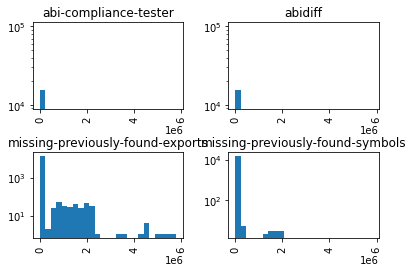

In [50]:
# This is showing bytes per second, so the slowest (abi tester) has most results clumped
# around zero - faster speeds are further to the left.
df_merged.hist(by="analysis", column="megabytes_per_second", bins=25, log=True, range=(df_merged['megabytes_per_second'].min(),df_merged['megabytes_per_second'].max()))

<AxesSubplot:title={'center':'Predictor Speed as a Function of Binary Size'}, xlabel='size MB', ylabel='seconds'>

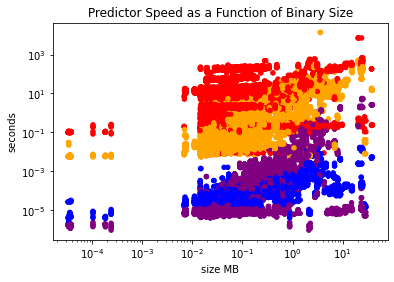

In [56]:
# This is showing bytes per second, so the slowest (abi tester) has most results clumped
# around zero - faster speeds are further to the left.
colors = {"abi-compliance-tester": "red", "missing-previously-found-exports": "purple", "missing-previously-found-symbols": "blue", "abidiff": "orange"}
df_merged['color'] = [colors[name] for name in df_merged['analysis']]
df_merged.plot.scatter(y="seconds", x="megabytes", c="color", logx=True, logy=True, legend=True,
                       title="Predictor Speed as a Function of Binary Size", xlabel="size MB")

In [64]:
# df_merged.plot.line(y="seconds", x="megabytes", logx=True, logy=True, legend=True,
#               title="Predictor Speed as a Function of Binary Size", xlabel="size MB")
# print(pandas.cut(df_merged['megabytes'], bins=4).value_counts())

In [9]:
# How many unique libraries?
library_count = list(df['original'].values) + list(df['changed'].values)
print('Found %s total libraries' % len(library_count))
print('Found %s unique libraries' % len(set(library_count)))

Found 61280 total libraries
Found 3632 unique libraries


In [10]:
# Look to see if we have True/False
for predictor in df['predictor'].unique():
    print(predictor)
    print(df[ df['predictor']==predictor]['prediction'].unique())

    
# disagree = df.groupby(["a","b", "original", "changed"])['prediction'].nunique() > 1
# disagree = pandas.DataFrame(disagree)
# Where all predictors agree
all_predictors_agree = pandas.DataFrame(df.groupby(['a', 'b', 'original', 'changed'])['prediction'].nunique() == 1).reset_index()
df_all_agree = df.merge(all_predictors_agree, on=['a', 'b', 'original', 'changed'], suffixes=["", "_all_agree"])
df_all_agree = df_all_agree[df_all_agree['prediction_all_agree']]
df_all_agree

symbols
[False True 'Unknown']
libabigail
[False True]
abi-laboratory
[False 'Terminated' True]


,a,b,original,changed,analysis,seconds,predictor,prediction,size_original,size_changed,prediction_all_agree
20,fedora-libs-34,fedora-libs-37,first/usr/lib64/libSDL2_image-2.0.so.0.2.3,second/usr/lib64/libSDL2_image-2.0.so.0.600.1,missing-previously-found-symbols,0.000068,symbols,False,144312,181496,True
21,fedora-libs-34,fedora-libs-37,first/usr/lib64/libSDL2_image-2.0.so.0.2.3,second/usr/lib64/libSDL2_image-2.0.so.0.600.1,missing-previously-found-exports,0.000061,symbols,False,144312,181496,True
22,fedora-libs-34,fedora-libs-37,first/usr/lib64/libSDL2_image-2.0.so.0.2.3,second/usr/lib64/libSDL2_image-2.0.so.0.600.1,abidiff,0.063972,libabigail,False,144312,181496,True
23,fedora-libs-34,fedora-libs-37,first/usr/lib64/libSDL2_image-2.0.so.0.2.3,second/usr/lib64/libSDL2_image-2.0.so.0.600.1,abi-compliance-tester,0.186612,abi-laboratory,False,144312,181496,True
24,fedora-libs-34,fedora-libs-36,first/usr/lib64/libaudit.so.1.0.0,second/usr/lib64/libaudit.so.1.0.0,missing-previously-found-symbols,0.000049,symbols,False,135256,134840,True
...,...,...,...,...,...,...,...,...,...,...,...
30611,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/plugi...,second/usr/lib/gcc/x86_64-redhat-linux/12/plug...,abi-compliance-tester,284.179451,abi-laboratory,True,54088,54056,True
30612,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/plugi...,second/usr/lib/gcc/x86_64-redhat-linux/12/plug...,missing-previously-found-symbols,0.000036,symbols,True,53384,53384,True
30613,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/plugi...,second/usr/lib/gcc/x86_64-redhat-linux/12/plug...,missing-previously-found-exports,0.000016,symbols,True,53384,53384,True
30614,fedora-libs-36,fedora-libs-37,first/usr/lib/gcc/x86_64-redhat-linux/12/plugi...,second/usr/lib/gcc/x86_64-redhat-linux/12/plug...,abidiff,0.408989,libabigail,True,53384,53384,True


In [11]:
# Convert to wide format where analysis and predictor are columns.
df_wide = pandas.pivot(df, columns=['analysis', 'predictor'], index=['a', 'b', 'original', 'changed'], values='prediction')
df_wide

analysis                                                                                                                            missing-previously-found-symbols  \
predictor                                                                                                                                                    symbols   
a              b              original                                           changed                                                                               
fedora-libs-34 fedora-libs-35 first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
...                                                                                                                                                              ...   
fedora-libs-36 fedora-libs-37 first/usr/lib64/security/pam_userdb.so             second/usr/lib64/security/pam_userdb.so                                        True   
                              first/usr/lib64/security/pam_usertype.so           second/usr/lib64/security/pam_usertype.so                                      True   
                              first/usr/lib64/security/pam_warn.so               second/usr/lib64/security/pam_warn.so                                          True   
                              first/usr/lib64/security/pam_wheel.so              second/usr/lib64/security/pam_wheel.so                                         True   
                              first/usr/lib64/security/pam_xauth.so              second/usr/lib64/security/pam_xauth.so                                         True   

analysis                                                                                                                            missing-previously-found-exports  \
predictor                                                                                                                                                    symbols   
a              b              original                                           changed                                                                               
fedora-libs-34 fedora-libs-35 first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
                              first/usr/lib/gcc/x86_64-redhat-linux/11/32/lib... second/usr/lib/gcc/x86_64-redhat-linux/11/32/li...                          Unknown   
...                                                                                                                                                              ...   
fedora-libs-36 fedora-libs-37 first/usr/lib64/security/pam_userdb.so             second/usr/lib64/security/pam_userdb.so               

In [12]:
# Join analysis/predictor columns
df_wide = df_wide.reset_index()
df_wide.columns = ["_".join(names) for names in df_wide.columns]
df_wide.columns

Index(['a_', 'b_', 'original_', 'changed_',
       'missing-previously-found-symbols_symbols',
       'missing-previously-found-exports_symbols', 'abidiff_libabigail',
       'abi-compliance-tester_abi-laboratory'],
      dtype='object')

In [13]:
# Get predictions only
df_predictions = df_wide[['abidiff_libabigail', 'abi-compliance-tester_abi-laboratory',
                         'missing-previously-found-symbols_symbols',
                         'missing-previously-found-exports_symbols']]
df_predictions

,abidiff_libabigail,abi-compliance-tester_abi-laboratory,missing-previously-found-symbols_symbols,missing-previously-found-exports_symbols
0,False,False,Unknown,Unknown
1,False,False,Unknown,Unknown
2,False,False,Unknown,Unknown
3,False,False,Unknown,Unknown
4,False,False,Unknown,Unknown
...,...,...,...,...
7655,True,False,True,True
7656,True,False,True,True
7657,True,False,True,True
7658,True,False,True,True


In [14]:
# Filter to where predictions are either "True" or "False" only.
num_predictors = 4
df_predictions = df_predictions[(df_predictions == True).sum(axis=1) + (df_predictions == False).sum(axis=1) == num_predictors]

# Look to see if we have True/False
for column in df_predictions.columns:
    print(column)
    print(df_predictions[column].unique())
    
df_predictions

abidiff_libabigail
[True False]
abi-compliance-tester_abi-laboratory
[True False]
missing-previously-found-symbols_symbols
[True False]
missing-previously-found-exports_symbols
[True False]


,abidiff_libabigail,abi-compliance-tester_abi-laboratory,missing-previously-found-symbols_symbols,missing-previously-found-exports_symbols
9,True,True,True,True
13,False,False,False,False
15,True,True,True,True
16,True,True,True,True
17,True,True,True,True
...,...,...,...,...
7655,True,False,True,True
7656,True,False,True,True
7657,True,False,True,True
7658,True,False,True,True


In [15]:
# Correlations between predictors.
# The NaN means that the values don't vary (as we see above, the symbols check is always true)
(df_predictions == True).corr()

,abidiff_libabigail,abi-compliance-tester_abi-laboratory,missing-previously-found-symbols_symbols,missing-previously-found-exports_symbols
abidiff_libabigail,1.000000,0.621394,0.500822,0.462317
abi-compliance-tester_abi-laboratory,0.621394,1.000000,0.363744,0.361094
missing-previously-found-symbols_symbols,0.500822,0.363744,1.000000,0.546399
missing-previously-found-exports_symbols,0.462317,0.361094,0.546399,1.000000
